In [1]:
import os
import pandas as pd

In [2]:
HOUSING_PATH = "/home/dominika/Desktop/Programming/Housing/"

In [3]:
os.getcwd()

'/home/dominika/Desktop/Programming/Housing'

## Review the data ##

In [4]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

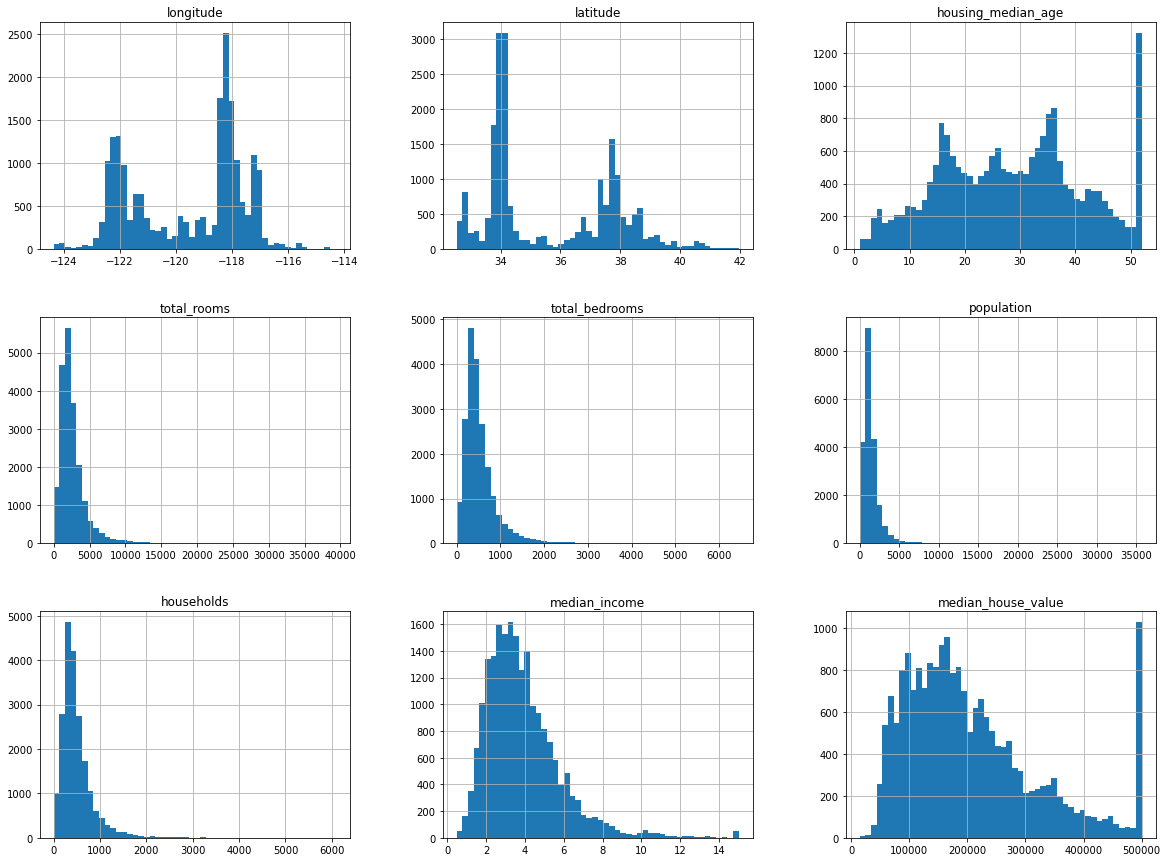

In [10]:
housing.hist(bins=50, figsize=(20,15))

## Train and Test sets ##

In [11]:
import numpy as np

In [12]:
def split_train_test(data, test_ratio):
    indices = np.arange(len(data))
    np.random.shuffle(indices)
    test_set_size = int(len(data) * test_ratio)
    test_indices=indices[:test_set_size]
    train_indices=indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
train_set, test_set = split_train_test(housing, 0.2)

In [14]:
len(train_set)

16512

In [15]:
len(test_set)

4128

Creating data sets based on index to avoid data sets changes

In [16]:
import hashlib

In [17]:

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [18]:
def split_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set=ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

Jezeli nie ma unikalnego indexu, mozna uzyc indeksu wiersza

In [19]:
housing_with_id = housing.reset_index() #adding index column

In [20]:
train_set, test_set = split_test_by_id(housing_with_id, 0.2, 'index')

In [21]:
len(train_set)

16362

In [22]:
len(test_set)

4278

Wbudowane funkcje

In [23]:
from sklearn.model_selection import train_test_split

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [24]:
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

Strafied Sampling - zachowanie proporcji przykladow danej cechy w danych testowych i uczacych

In [25]:
housing['income_cat'] = np.ceil(housing['median_income']/1.5)
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace = True)

<AxesSubplot:>

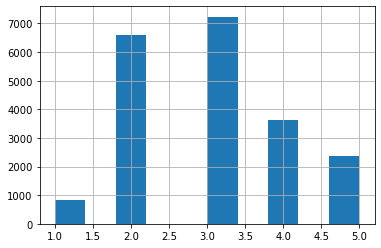

In [26]:
housing['income_cat'].hist()

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit

In [28]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_trin_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [29]:
housing['income_cat'].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [30]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114341
1.0    0.039971
Name: income_cat, dtype: float64

In [31]:
for set_ in (strat_trin_set, strat_test_set):
    set_.drop("income_cat", inplace = True, axis = 1)

## Deep dive into data ##

In [32]:
housing = strat_trin_set.copy()

Wizualizowanie Danych Geograficznych

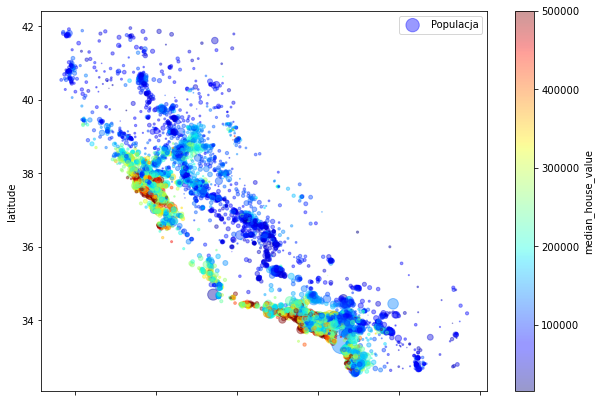

In [33]:
housing.plot(kind="scatter", x = "longitude", y = "latitude", alpha=0.4, 
             s=housing['population']/100, label = "Populacja", figsize = (10, 7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar = True)
plt.legend()
#s - promien kolek
#c - kolor
#cmap - zmienia kolorki

Poszukiwanie korelacji

In [34]:
corr_matrix = housing.corr(numeric_only = True)
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


In [35]:
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [36]:
from pandas.plotting import scatter_matrix

In [37]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

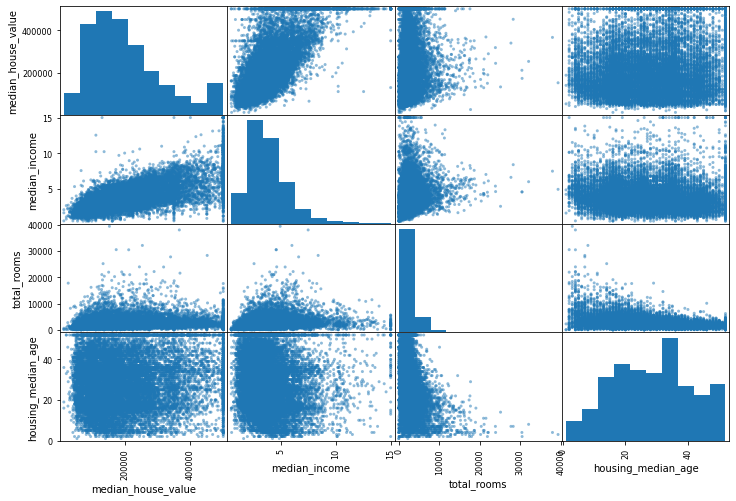

In [38]:
scatter_matrix(housing[attributes], figsize = (12, 8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

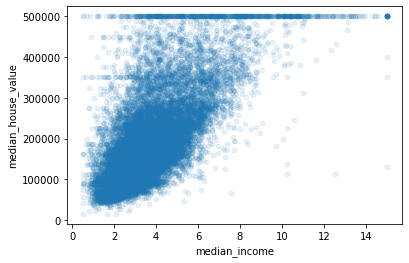

In [39]:
housing.plot(kind="scatter", x = "median_income", y = "median_house_value", alpha = 0.1)
#mozna zauwzayc linie odciecia na 500k, ale tez inne na 450k czy 350k

Kombinacje atrybutow

In [40]:
housing["rooms_per_fam"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_to_rooms"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["pop_per_fam"] = housing["population"]/housing["households"]

In [41]:
corr_max = housing.corr(numeric_only=True)

In [42]:
corr_max["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687151
rooms_per_fam         0.146255
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
pop_per_fam          -0.021991
population           -0.026882
longitude            -0.047466
latitude             -0.142673
bedrooms_to_rooms    -0.259952
Name: median_house_value, dtype: float64

## Przygotowanie danych ##

In [43]:
housing = strat_trin_set.drop("median_house_value", axis = 1)
housing_labels = strat_trin_set["median_house_value"]

#### Oczyszczanie danych ####

Uzupelnianie nullowych wartosci (usuniecie wierszy, atrybutu lub uzupelnienie wartosci)



In [44]:
from sklearn.impute import SimpleImputer

In [45]:
imputer = SimpleImputer(strategy = 'median') #tylko do danych numerycznych

In [46]:
housing_num = housing.drop('ocean_proximity', axis = 1)

In [47]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [48]:
X = imputer.transform(housing_num)

In [49]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns)

#### Obsluga tekstu i atrybutow kategorialnych ####

In [50]:
from sklearn.preprocessing import LabelEncoder
#ma sens jedynie jezeli bliskie kategorie sa zamienione na bliskie liczby

In [51]:
encoder = LabelEncoder()

In [52]:
housing_cat = housing["ocean_proximity"]

In [53]:
housing_cat_encoded = encoder.fit_transform(housing_cat)

In [54]:
housing_cat_encoded

array([1, 4, 1, ..., 0, 0, 1])

In [55]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

One-hot encoding

In [56]:
from sklearn.preprocessing import OneHotEncoder

In [57]:
encoder = OneHotEncoder()

In [58]:
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1)) #-1 oznacza, ze wymiar jest niesprecyzowany

In [59]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

LabelBinarizer - wykonuje obie transformacje na raz

In [60]:
from sklearn.preprocessing import LabelBinarizer

In [61]:
encoder = LabelBinarizer()

In [62]:
housing_cat_1hot = encoder.fit_transform(housing_cat)

In [63]:
housing_cat_1hot

array([[0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [64]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

In [65]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # żadnych zmiennych *args ani **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nie robi nic innego
    def transform(self, X, y=None):
        Pokoje_na_rodzinę = X[:, rooms_ix] / X[:, household_ix]
        Populacja_na_rodzinę = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            Sypialnie_na_pokoje = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, Pokoje_na_rodzinę, Populacja_na_rodzinę, Sypialnie_na_pokoje]
        else:
            return np.c_[X, Pokoje_na_rodzinę, Populacja_na_rodzinę]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

#### Potoki transformujace ####

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [67]:
num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy = 'median')),
  ('attribs_adder', CombinedAttributesAdder()),
  ('std_scaler', StandardScaler()),
])

In [68]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

Klasa do przeksztalcania dataframe na numpy

In [69]:
from sklearn.preprocessing import OneHotEncoder

In [70]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y = None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [71]:
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

In [72]:
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

In [73]:
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', OneHotEncoder())
])

Polaczenie potokow

In [74]:
from sklearn.pipeline import FeatureUnion

In [75]:
full_pipeline = FeatureUnion([
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

In [76]:
housing_prepared = full_pipeline.fit_transform(housing)

## Wybor i uczenie modelu ##

#### Trenowanie i ocena modelu za pomoca zbioru uczacego ####

Regresja Liniowa

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [79]:
from sklearn.metrics import mean_squared_error

In [80]:
housing_predictions = lin_reg.predict(housing_prepared)

In [81]:
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

In [82]:
lin_rmse

68627.87390019077

Drzewo decyzyjne

In [83]:
from sklearn.tree import DecisionTreeRegressor

In [84]:
tree_reg = DecisionTreeRegressor()

In [85]:
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [86]:
housing_predictions_tree = tree_reg.predict(housing_prepared)

In [87]:
tree_rmse = np.sqrt(mean_squared_error(housing_labels, housing_predictions_tree))

In [88]:
tree_rmse

0.0

Sprawdzian krzyzowy

In [89]:
from sklearn.model_selection import cross_val_score

In [90]:
#oczekuje funkcji uzytecznosci
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, 
                         scoring="neg_mean_squared_error", cv = 10)

In [91]:
tree_rmse_scores = np.sqrt(-scores)

In [92]:
tree_rmse_scores

array([72066.01590785, 70555.37783245, 69286.8894233 , 71777.95380713,
       70746.40780536, 77973.71911109, 71258.53905529, 73258.22910661,
       69448.96525045, 72097.28444531])

In [93]:
def display_scores(scores):
    print("Results: ", scores)
    print("Mean: ", np.mean(scores))
    print("Std: ", np.std(scores))

In [94]:
display_scores(tree_rmse_scores)

Results:  [72066.01590785 70555.37783245 69286.8894233  71777.95380713
 70746.40780536 77973.71911109 71258.53905529 73258.22910661
 69448.96525045 72097.28444531]
Mean:  71846.93817448213
Std:  2348.919887491466


In [95]:
#dla regresji liniowej

In [96]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error", cv = 10)

In [97]:
display_scores(np.sqrt(-lin_scores))

Results:  [71762.76425039 64114.99204615 67771.16814051 68635.19071822
 66846.14367667 72528.03735982 73997.07985038 68802.33578231
 66443.2884623  70139.80038356]
Mean:  69104.08006703161
Std:  2880.328064805007


In [98]:
#dla lasow losowych

In [99]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [100]:
forest_pred = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)

In [101]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error", cv = 10)

#### Zapis modeli ####

In [106]:
#import joblib
#joblib.dump(my_model, "model.pkl")
#my_loaded_model = joblib.load("model.pkl")

## Regulacja modelu ##

#### Metoda przeszukiwania siatki ####

In [110]:
from sklearn.model_selection import GridSearchCV

In [116]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

In [117]:
forest_reg = RandomForestRegressor()

In [118]:
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, scoring = 'neg_mean_squared_error')

In [119]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [120]:
cvres=grid_search.cv_results_

In [121]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63481.8752421235 {'max_features': 2, 'n_estimators': 3}
55825.71215749387 {'max_features': 2, 'n_estimators': 10}
52694.6869834934 {'max_features': 2, 'n_estimators': 30}
60807.067768625835 {'max_features': 4, 'n_estimators': 3}
52791.94718722805 {'max_features': 4, 'n_estimators': 10}
50513.2629791449 {'max_features': 4, 'n_estimators': 30}
58855.983531552665 {'max_features': 6, 'n_estimators': 3}
52523.7393248281 {'max_features': 6, 'n_estimators': 10}
50026.80163897465 {'max_features': 6, 'n_estimators': 30}
58993.589232484475 {'max_features': 8, 'n_estimators': 3}
52292.11579086937 {'max_features': 8, 'n_estimators': 10}
50006.466301110726 {'max_features': 8, 'n_estimators': 30}
61495.22802258734 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53842.095248058955 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60207.03339648125 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52410.11156606077 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

#### Analiza modelu ####

In [125]:
feature_importance = grid_search.best_estimator_.feature_importances_

In [126]:
feature_importance

array([6.50952119e-02, 6.12131308e-02, 4.50123788e-02, 1.59317811e-02,
       1.43646004e-02, 1.50244857e-02, 1.48686286e-02, 3.66847939e-01,
       5.86526605e-02, 1.12082121e-01, 5.89897094e-02, 4.50815306e-03,
       1.62043740e-01, 9.19425916e-05, 2.05671255e-03, 3.21680408e-03])

In [127]:
extra_attribs = ["rooms_per_fam", "pop_per_fam", "bedrooms_per_room"]

In [128]:
cat_one_hot_attribs = list(encoder.classes_)

In [129]:
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

In [130]:
sorted(zip(feature_importance, attributes), reverse=True)

[(0.36684793912665103, 'median_income'),
 (0.16204374017575374, 'INLAND'),
 (0.11208212127211008, 'pop_per_fam'),
 (0.06509521194979191, 'longitude'),
 (0.06121313082798937, 'latitude'),
 (0.058989709387393445, 'bedrooms_per_room'),
 (0.05865266045951504, 'rooms_per_fam'),
 (0.04501237878929674, 'housing_median_age'),
 (0.015931781051322848, 'total_rooms'),
 (0.015024485665950939, 'population'),
 (0.014868628582866198, 'households'),
 (0.014364600419757704, 'total_bedrooms'),
 (0.004508153064508551, '<1H OCEAN'),
 (0.003216804080645299, 'NEAR OCEAN'),
 (0.0020567125548247964, 'NEAR BAY'),
 (9.194259162235055e-05, 'ISLAND')]

#### Ocena systemu za pomoca zbioru testowego ####

In [133]:
final_model = grid_search.best_estimator_

In [134]:
X_test = strat_test_set.drop("median_house_value", axis = 1)
y_test = strat_test_set["median_house_value"].copy()

In [135]:
X_test_prepared = full_pipeline.transform(X_test)

In [136]:
final_predicrtions = final_model.predict(X_test_prepared)

In [137]:
final_mse = mean_squared_error(y_test, final_predicrtions)

In [138]:
final_rmse = np.sqrt(final_mse)

In [139]:
final_rmse

48142.927942554736

## Exercises ##

#### SVR

In [142]:
from sklearn.svm import SVR

In [153]:
svr_model = SVR()

In [154]:
param_grid = [
    {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']},
    {'C' : np.linspace(0.1, 1.5, 10)},
    {'gamma' : ['scale', 'auto']}
]

In [156]:
svr_grid = GridSearchCV(svr_model, param_grid, cv = 5, scoring = 'neg_mean_squared_error')

In [157]:
svr_grid.fit(housing_prepared, housing_labels)

ValueError: X should be a square kernel matrix

#### GridSearchCV ####